# DATAFRAME SOCIAL

In [1]:
import re
import os
import xml.etree.ElementTree as ET
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creamos un dataframe dónde incluimos a hombres y mujeres en la consulta, edad, país, nivel de estudios, puesto de trabajo, sector y tamaño de la compañía.

In [2]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database='proyecto_1_equipo_1')
mycursor = cnx.cursor()
mycursor.execute("""SELECT xml.gender, xml.age, txt.q3, txt.q4, txt.q5, txt.q20, txt.q21
                    FROM data_txt AS txt
                    INNER JOIN data_xml AS xml
                    ON txt.index_sql = xml.index_sql ;""")

myresult = mycursor.fetchall()
df_proyecto2 = pd.DataFrame(myresult, columns = ["género","edad","pais", "nivel de estudios", "puesto de trabajo", "sector", "tamaño de la compañia"])
cnx.close()

In [3]:
df_proyecto2.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees"
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees"
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees"
3,Man,45-49,India,Doctoral degree,Other,Academics/Education,50-249 employees
4,Woman,25-29,India,I prefer not to answer,Currently not employed,,


### Creamos una nueva columna con los continentes usando "apply()".

In [4]:
continente1 = ['India', 'Turkey','Viet Nam', 'Bangladesh', 'Indonesia', 
        'Singapore', 'Taiwan', 'Hong Kong (S.A.R.)', 'Israel', 'Pakistan', 'Philippines', 'United Arab Emirates', 'Thailand', 'Japan', 'China', 'South Korea', 
       'Saudi Arabia', 'Malaysia', 'Kazakhstan', 'Nepal']

continente2 = ['Iran, Islamic Republic of...', 'Egypt','Morocco','Tunisia','Nigeria','Kenya','South Africa',
       'Algeria','Ghana','Uganda', 'Ethiopia', 'Iraq']

continente3 = ['Poland','Russia', 'Italy', 'Sweden',
       'Ireland', 'United Kingdom of Great Britain and Northern Ireland','Spain',
       'Germany', 'Belgium', 'Austria',
       'France', 'Romania', 'Ukraine', 
       'Netherlands', 'Portugal', 'Norway',
       'Czech Republic', 'Greece', 'Switzerland',
       'Denmark','Belarus']

continente4 = ['United States of America','Canada']

continente5 = ['Brazil', 'Argentina','Colombia', 'Mexico', 'Peru', 'Ecuador','Chile']

continente6 = ['Australia']

In [5]:
def continente(pais):
    if pais in continente1:
        return "Asia"
    elif pais in continente2:
        return "África"
    elif pais in continente3:
        return "Europa"
    elif pais in continente4:
        return "América del Norte"
    elif pais in continente5:
        return "América del Sur"
    elif pais in continente6:
        return "Oceanía"

In [6]:
df_proyecto2["continente"] = df_proyecto2["pais"].apply(continente)

In [7]:
df_proyecto2.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
3,Man,45-49,India,Doctoral degree,Other,Academics/Education,50-249 employees,Asia
4,Woman,25-29,India,I prefer not to answer,Currently not employed,,,Asia


### Filtramos los datos para no incluir a los estudiantes ni desempleados en nuestro dataframe.

In [8]:
df_proyecto3 = df_proyecto2[(df_proyecto2['puesto de trabajo'] != "Student") & (df_proyecto2['puesto de trabajo'] != "Other") & (df_proyecto2['puesto de trabajo'] != "Currently not employed")]
df_proyecto3.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África


### Filtramos los datos para no incluir cualquier sexo que no sea hombre o mujer.

In [9]:
df_proyecto3 = df_proyecto3[(df_proyecto3["género"]== "Man") | (df_proyecto3["género"]=="Woman")]

### Creamos una gráfica para ver la diferencia entre hombres y mujeres por continente.

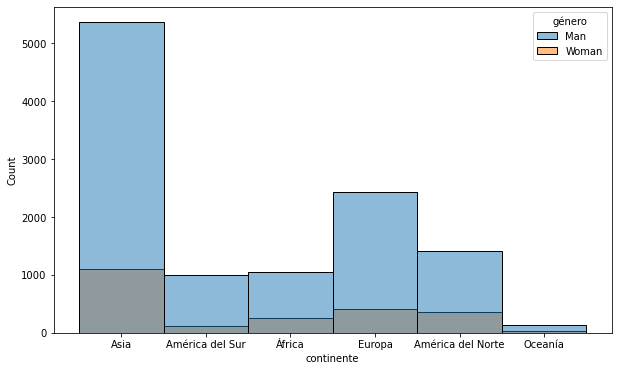

In [10]:
plt.figure(figsize=(10,6))

fig = sns.histplot(x = df_proyecto3["continente"], data = df_proyecto3, hue = df_proyecto3["género"])

plt.show()

### Creamos una gráfica para ver la diferencia entre hombres y mujeres por puesto de trabajo.

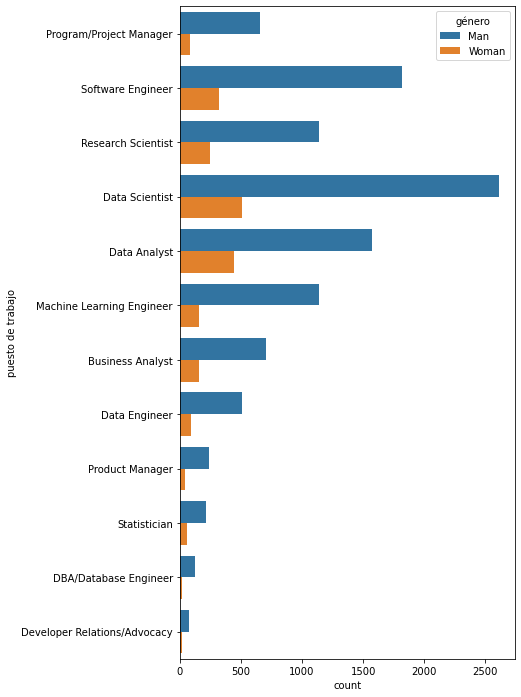

In [23]:
plt.figure(figsize=(6,12))

fig = sns.countplot(y =  df_proyecto3["puesto de trabajo"],  data = df_proyecto3, hue = df_proyecto3["género"])

plt.show()

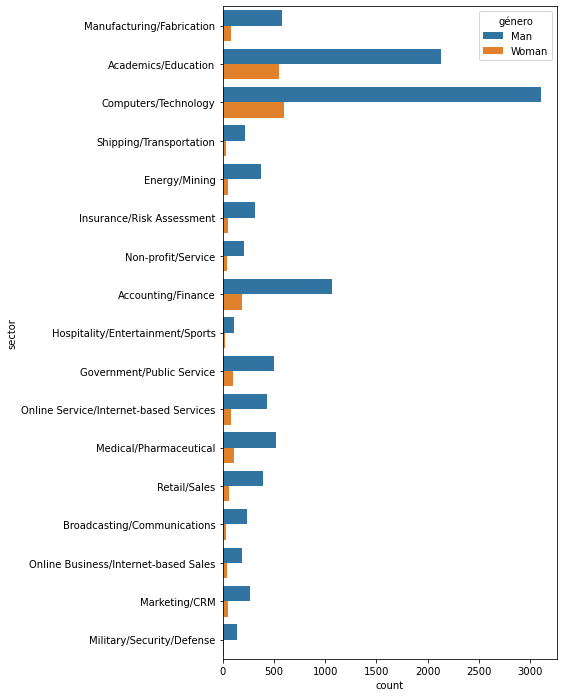

In [25]:
plt.figure(figsize=(6,12))

fig = sns.countplot(y =  df_proyecto3["sector"],  data = df_proyecto3, hue = df_proyecto3["género"])

plt.show()

In [13]:
df_proyecto3.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África


In [14]:
df_proyecto3["sector"].unique()

array(['Manufacturing/Fabrication', 'Academics/Education',
       'Computers/Technology', 'Shipping/Transportation', 'Energy/Mining',
       '', 'Insurance/Risk Assessment', 'Non-profit/Service',
       'Accounting/Finance', 'Hospitality/Entertainment/Sports', 'Other',
       'Government/Public Service',
       'Online Service/Internet-based Services', 'Medical/Pharmaceutical',
       'Retail/Sales', 'Broadcasting/Communications',
       'Online Business/Internet-based Sales', 'Marketing/CRM',
       'Military/Security/Defense'], dtype=object)

### Como vemos en la gráfica anterior, tenemos campos vacíos en la columna del sector professional, y un campo Other que en nuestro caso, no sería útil. Por lo tanto, filtramos de nuevo los registros que nos interesan para nuestro análisis.

In [15]:
df_proyecto3 = df_proyecto3[(df_proyecto3['sector'] != "") & (df_proyecto3['sector'] != "Other")]
df_proyecto3.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África


In [16]:
df_proyecto3["sector"].unique()

array(['Manufacturing/Fabrication', 'Academics/Education',
       'Computers/Technology', 'Shipping/Transportation', 'Energy/Mining',
       'Insurance/Risk Assessment', 'Non-profit/Service',
       'Accounting/Finance', 'Hospitality/Entertainment/Sports',
       'Government/Public Service',
       'Online Service/Internet-based Services', 'Medical/Pharmaceutical',
       'Retail/Sales', 'Broadcasting/Communications',
       'Online Business/Internet-based Sales', 'Marketing/CRM',
       'Military/Security/Defense'], dtype=object)

In [17]:
df_proyecto3.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África


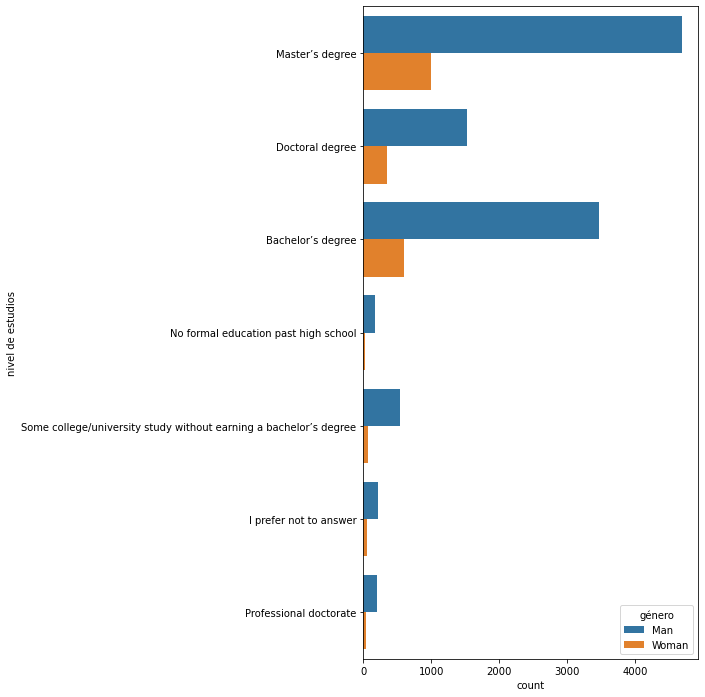

In [26]:
plt.figure(figsize=(6,12))

fig = sns.countplot(y =  df_proyecto3["nivel de estudios"],  data = df_proyecto3, hue = df_proyecto3["género"])


plt.show()

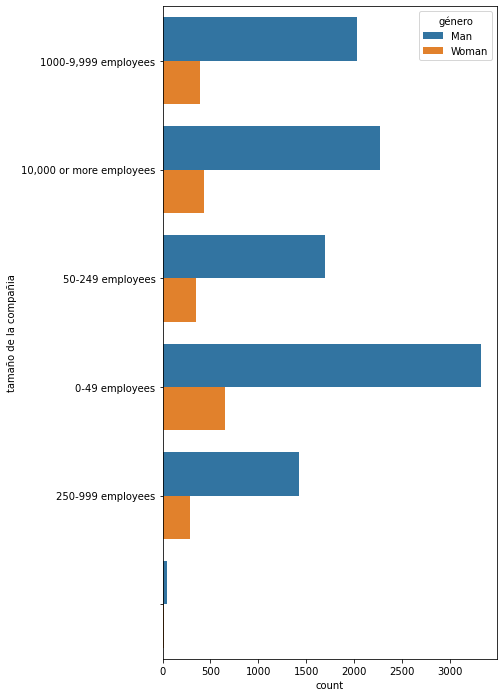

In [27]:
plt.figure(figsize=(6,12))

fig = sns.countplot(y =  df_proyecto3["tamaño de la compañia"],  data = df_proyecto3, hue = df_proyecto3["género"])

plt.show()

### Realizamos el mismo filtrado con la columna del tamaño de la compañia.

In [20]:
df_social = df_proyecto3[(df_proyecto3['tamaño de la compañia'] != "")]
df_social.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África


In [21]:
df_social["puesto de trabajo"].value_counts()

Data Scientist                  3109
Software Engineer               2126
Data Analyst                    2004
Research Scientist              1382
Machine Learning Engineer       1273
Business Analyst                 858
Program/Project Manager          742
Data Engineer                    594
Product Manager                  280
Statistician                     275
DBA/Database Engineer            145
Developer Relations/Advocacy      84
Name: puesto de trabajo, dtype: int64